In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math

In [2]:
def summary_test(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])

    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

In [8]:
def plot(alpha, n_nodes, local_step, dataset, model, optimizer, graphs, labels, colors=None, ls_list=None):
    if colors is None:
        colors = ["red", "black", "orange", "blue", "c", "yellow", "pink"]

    if ls_list is None:
        ls_list = ["solid" for _ in range(len(colors))]
        
    results = []

    plt.figure(figsize=(5,5))

    for graph, label, color, ls in zip(graphs, labels, colors, ls_list):
        
        acc_list = []
        lr_list = []
    
        for seed in [0]:
            lr = 0.1
            loss, acc = summary_test(f"../results_final/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
            acc_list.append(acc)
            lr_list.append(lr)
            
        
        avg, std = average_acc(acc_list)
        print(f"{graph}: \n\t {avg[-1]:.1f} ± {std[-1]:.2f}")
        plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, ls=ls, lw=1.5)
 
    plt.ylabel("Accuracy", fontsize=18)
    plt.xlabel("Epoch", fontsize=18)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


In [4]:
colors = ["red", "blue"]

In [5]:
n_nodes = 25
local_step = 1
dataset = "cifar10"
model = "vgg"
optimizer = "gossip"

one_peer_exp: 
	 85.6 ± 0.00
one_peer_base: 
	 87.1 ± 0.00


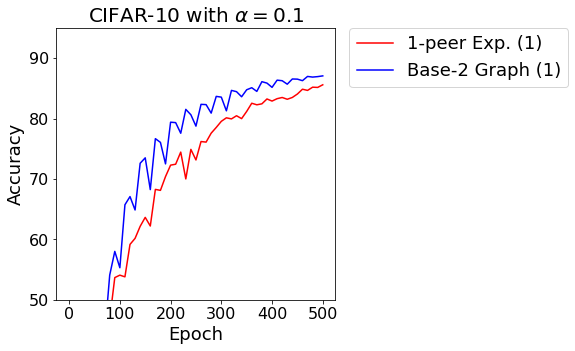

In [7]:
graphs = ["one_peer_exp", "one_peer_base"]
labels = ["1-peer Exp. (1)", "Base-2 Graph (1)"]

alpha = 0.1
plot(alpha, n_nodes, local_step, dataset, model, optimizer, graphs, labels, colors=colors)
plt.title(rf"CIFAR-10 with $\alpha={alpha}$", fontsize=20)

plt.ylim(50, 95)
plt.xticks([0, 100, 200, 300, 400, 500])
plt.yticks([50, 60, 70, 80, 90])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)